# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Get sample data for column names and API check
city = "London"
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Build query URL
query_url = url + "&q=" + city
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the data from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 9.45, 'feels_like': 7.52, 'temp_min': 8.19, 'temp_max': 10.44, 'pressure': 988, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 150}, 'clouds': {'all': 20}, 'dt': 1698870335, 'sys': {'type': 2, 'id': 2006068, 'country': 'GB', 'sunrise': 1698821590, 'sunset': 1698856493}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}.


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tura
Processing Record 2 of Set 1 | kiamba
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | alotau
City not found. Skipping...
Processing Record 5 of Set 1 | paimpol
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | xining
Processing Record 9 of Set 1 | ust'-kulom
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | lahad datu
Processing Record 15 of Set 1 | ta`u
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | taoudenni
Processing Record 20 of Set 1 | taksimo
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | bilibino
Processing 

Processing Record 39 of Set 4 | bonthe
Processing Record 40 of Set 4 | alice springs
Processing Record 41 of Set 4 | cabedelo
Processing Record 42 of Set 4 | utrik
Processing Record 43 of Set 4 | invercargill
Processing Record 44 of Set 4 | neunkirchen am brand
Processing Record 45 of Set 4 | greenwood
Processing Record 46 of Set 4 | petal
Processing Record 47 of Set 4 | svoge
Processing Record 48 of Set 4 | tarrafal de sao nicolau
Processing Record 49 of Set 4 | zhezqazghan
Processing Record 0 of Set 5 | ilheus
Processing Record 1 of Set 5 | howard springs
Processing Record 2 of Set 5 | palu
Processing Record 3 of Set 5 | margaret river
Processing Record 4 of Set 5 | tabou
Processing Record 5 of Set 5 | porto novo
Processing Record 6 of Set 5 | santiago papasquiaro
City not found. Skipping...
Processing Record 7 of Set 5 | maryborough
Processing Record 8 of Set 5 | xilin hot
Processing Record 9 of Set 5 | dukhan
Processing Record 10 of Set 5 | ketchikan
Processing Record 11 of Set 5 |

Processing Record 27 of Set 8 | martapura
Processing Record 28 of Set 8 | shawano
Processing Record 29 of Set 8 | arauca
Processing Record 30 of Set 8 | dunedin
Processing Record 31 of Set 8 | fisterra
Processing Record 32 of Set 8 | velasco ibarra
Processing Record 33 of Set 8 | belomorsk
Processing Record 34 of Set 8 | kawm umbu
Processing Record 35 of Set 8 | cromer
Processing Record 36 of Set 8 | akureyri
Processing Record 37 of Set 8 | lowestoft
Processing Record 38 of Set 8 | bamboo flat
Processing Record 39 of Set 8 | ubinskoye
Processing Record 40 of Set 8 | emerald
Processing Record 41 of Set 8 | bagudo
Processing Record 42 of Set 8 | suntar
Processing Record 43 of Set 8 | charters towers
Processing Record 44 of Set 8 | tejen
Processing Record 45 of Set 8 | nhamunda
Processing Record 46 of Set 8 | mek'ele
Processing Record 47 of Set 8 | charlottetown
Processing Record 48 of Set 8 | labasa
Processing Record 49 of Set 8 | sumbawa besar
Processing Record 0 of Set 9 | new norfolk


Processing Record 19 of Set 12 | messaad
Processing Record 20 of Set 12 | ugoofaaru
Processing Record 21 of Set 12 | zuni pueblo
Processing Record 22 of Set 12 | sukumo
Processing Record 23 of Set 12 | agdam
Processing Record 24 of Set 12 | barclayville
Processing Record 25 of Set 12 | lemvig
Processing Record 26 of Set 12 | mayya
Processing Record 27 of Set 12 | scottburgh
Processing Record 28 of Set 12 | mithi
Processing Record 29 of Set 12 | ciudad lazaro cardenas
Processing Record 30 of Set 12 | hailar
Processing Record 31 of Set 12 | santa cruz
Processing Record 32 of Set 12 | kupang
Processing Record 33 of Set 12 | tobelo
Processing Record 34 of Set 12 | merritt island
Processing Record 35 of Set 12 | axim
Processing Record 36 of Set 12 | airuk
Processing Record 37 of Set 12 | brooks
Processing Record 38 of Set 12 | pashkovskiy
Processing Record 39 of Set 12 | el bauga
Processing Record 40 of Set 12 | sirte
Processing Record 41 of Set 12 | mugia
Processing Record 42 of Set 12 | f

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tura,25.5198,90.2201,19.84,85,3,1.28,IN,1698870366
1,kiamba,5.9894,124.6242,25.49,86,70,1.65,PH,1698870366
2,port-aux-francais,-49.3500,70.2167,3.66,75,7,10.62,TF,1698870367
3,paimpol,48.7784,-3.0438,12.96,87,100,17.20,FR,1698870367
4,grytviken,-54.2811,-36.5092,0.92,72,16,5.88,GS,1698870368


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,19.84,85,3,1.28,IN,1698870366
1,kiamba,5.9894,124.6242,25.49,86,70,1.65,PH,1698870366
2,port-aux-francais,-49.3500,70.2167,3.66,75,7,10.62,TF,1698870367
3,paimpol,48.7784,-3.0438,12.96,87,100,17.20,FR,1698870367
4,grytviken,-54.2811,-36.5092,0.92,72,16,5.88,GS,1698870368


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

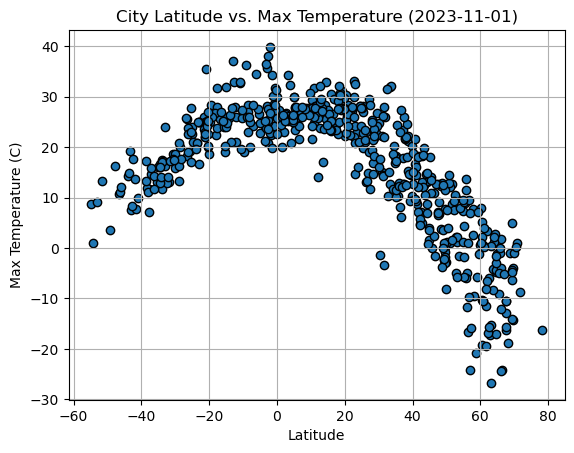

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    marker="o",
    edgecolor="black",
    label="City"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

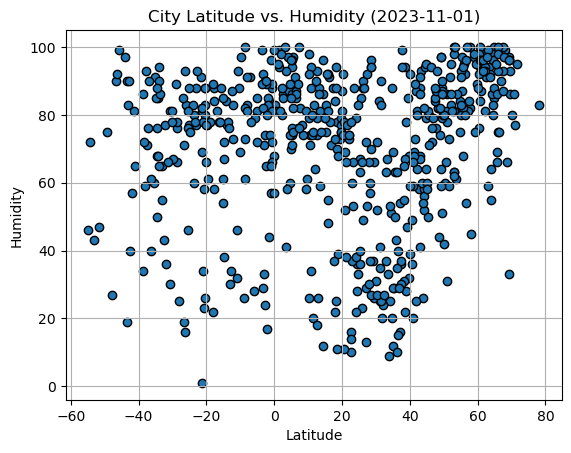

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    marker="o",
    edgecolor="black",
    label="City"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

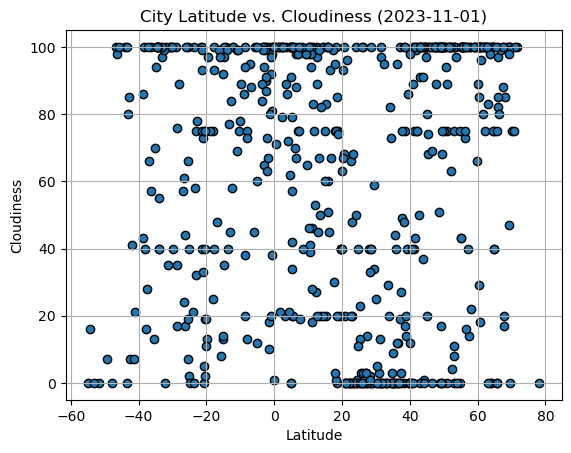

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    marker="o",
    edgecolor="black",
    label="City"
)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

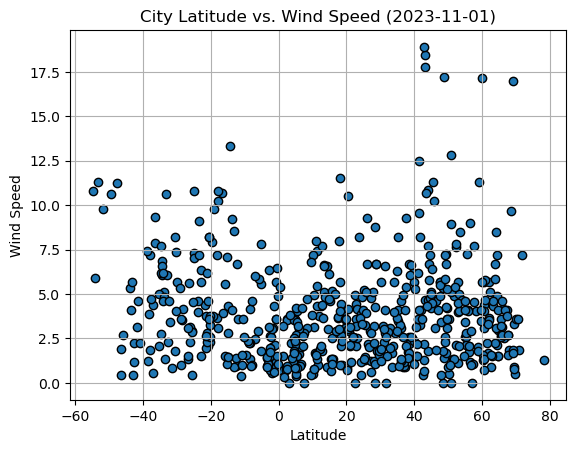

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    marker="o",
    edgecolor="black",
    label="City"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

def stats_linear_regression(x_values, y_values, title, coordinates):
    
    # Linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Label plot and annotate the line equation
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    # Print r value
    print(f"The r-value is: {rvalue**2}")
    
    # Show plot
    plt.show()


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
                                       
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,19.84,85,3,1.28,IN,1698870366
1,kiamba,5.9894,124.6242,25.49,86,70,1.65,PH,1698870366
3,paimpol,48.7784,-3.0438,12.96,87,100,17.20,FR,1698870367
5,albany,42.6001,-73.9662,7.23,58,50,0.45,US,1698870331
6,xining,36.6167,101.7667,6.20,40,12,0.91,CN,1698870368


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]
                                       
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,3.66,75,7,10.62,TF,1698870367
4,grytviken,-54.2811,-36.5092,0.92,72,16,5.88,GS,1698870368
8,puerto ayora,-0.7393,-90.3518,26.98,88,81,3.58,EC,1698870369
10,puerto natales,-51.7236,-72.4875,13.25,47,0,9.77,CL,1698870369
13,ta`u,-14.2336,-169.5144,25.81,84,100,13.33,AS,1698870370


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7488744462981357


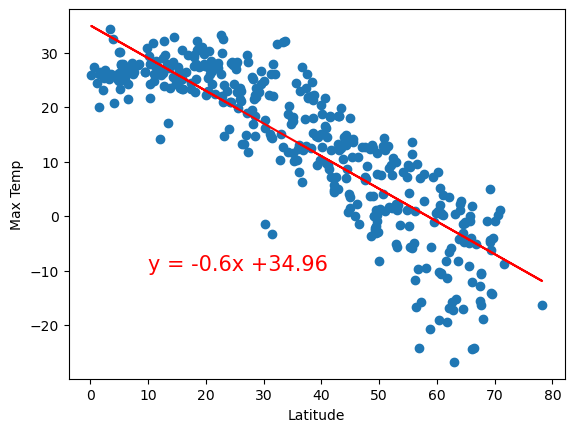

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
stats_linear_regression(x_values, y_values, "Max Temp",(10,-10))

The r-value is: 0.6358768486918346


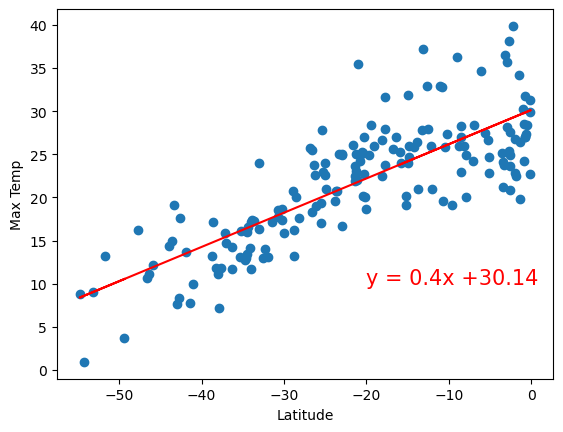

In [35]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
stats_linear_regression(x_values, y_values, "Max Temp",(-20, 10))

**Discussion about the linear relationship:** Max temperatures are highly correlated with latitude in both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03682206067304159


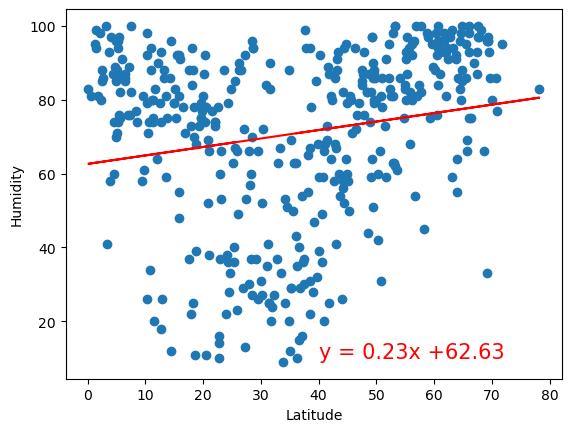

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
stats_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.005459435616033452


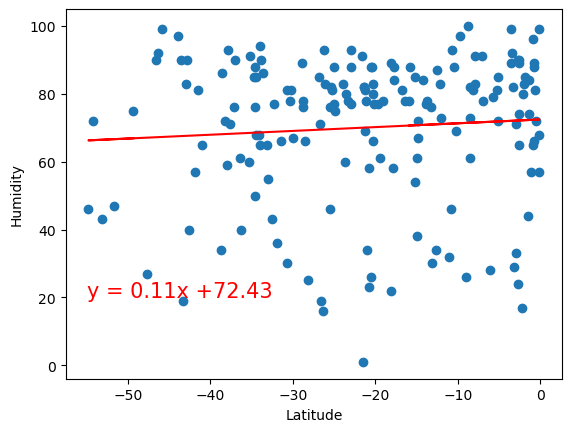

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
stats_linear_regression(x_values, y_values, "Humidity", (-55, 20))


**Discussion about the linear relationship:** Humidity is not correlated to Latitude. Low r value.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02380332490804682


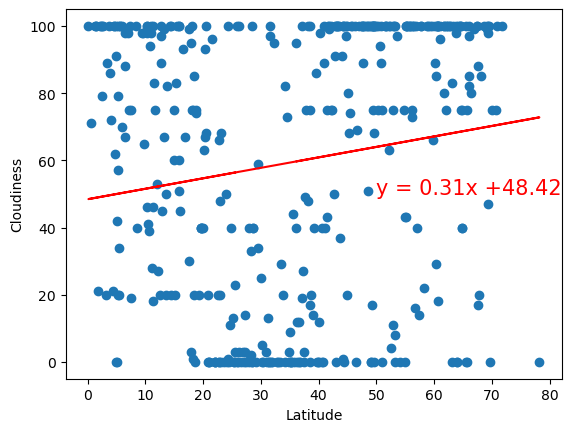

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
stats_linear_regression(x_values, y_values, "Cloudiness",(50,50))

The r-value is: 0.04964714561725496


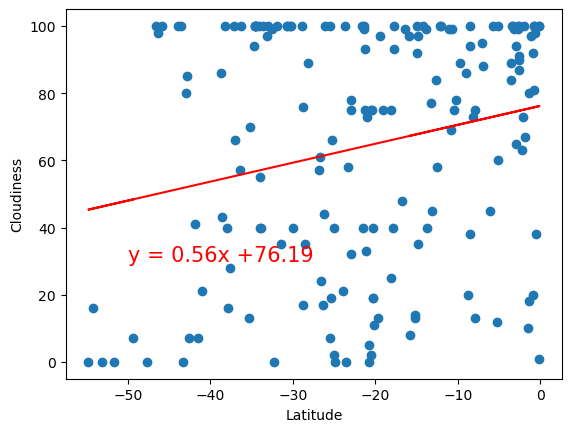

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
stats_linear_regression(x_values, y_values, "Cloudiness", (-50,30))

**Discussion about the linear relationship:** Cloudiness not correlated with Latitude. Low r value.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.026555449651563673


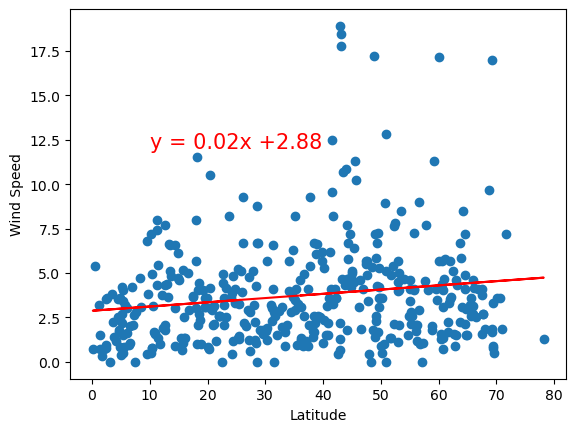

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
stats_linear_regression(x_values, y_values, "Wind Speed",(10,12))

The r-value is: 0.10116999107436886


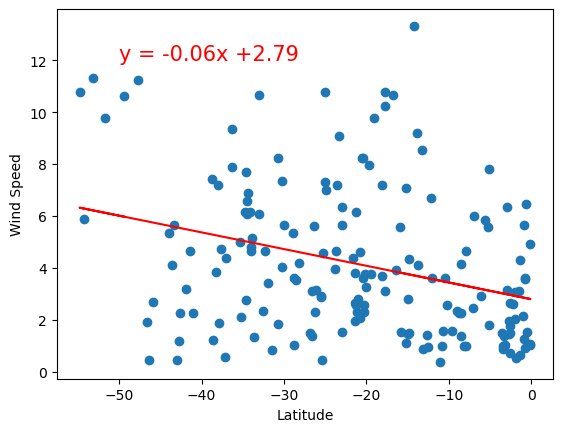

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
stats_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** Wind Speed not correlated with Latitude.